In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils.plotter as pltutils
from importlib import reload
reload(pltutils);

In [2]:
# import seaborn as sns
# sns.set_style("ticks")
# sns.set_context("paper")
# sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
LABELS_SIZE = 16
LEGEND_SIZE = 12
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=LABELS_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=LABELS_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["mathtext.fontset"] = 'cm'
plt.rcParams["font.family"] =  "Times New Roman"

save_figs_to_folder = None # will not save if set to None
# save_figs_to_folder = './results/figs'

In [4]:
sweep_results_folder = './results/regret-sweep'
arrival_rate_list = [2, 4, 6]
noise_variance_list = [0, 0.01, 0.05, 0.1] 
show_theoretical = [0, 0, 0, 1]
plot_style = ['-x', '-o', '-s', '-^']

Fit co-effs [1 T^{2/3}] = [1821.795    8.052]
Fit co-effs [1 T^{2/3}] = [1171.131    8.997]
Fit co-effs [1 T^{2/3}] = [1640.226    6.646]


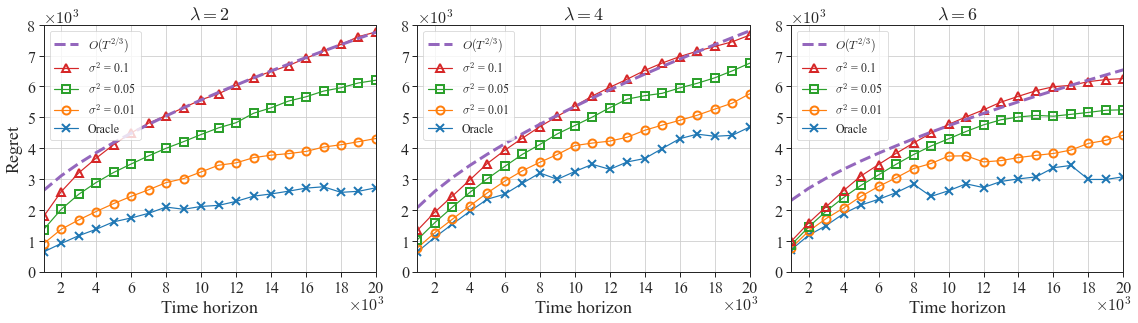

Fit co-effs [1 T^{2/3}] = [1821.795    8.052]


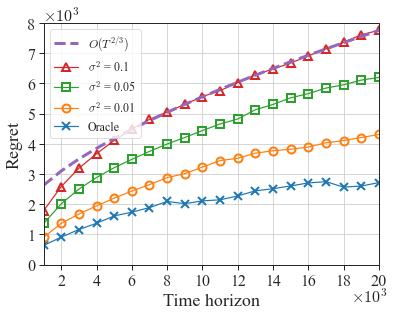

Fit co-effs [1 T^{2/3}] = [1171.131    8.997]


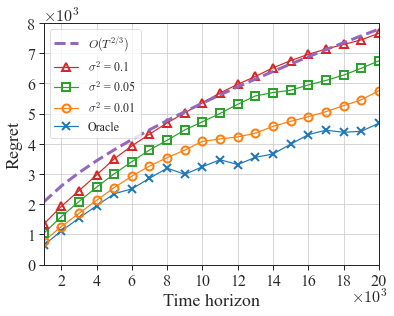

Fit co-effs [1 T^{2/3}] = [1640.226    6.646]


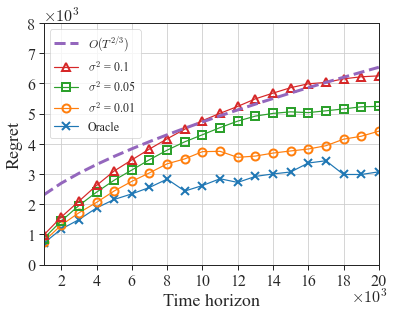

In [5]:
# combined plots
fig, axs = plt.subplots(nrows=1, ncols=len(arrival_rate_list), figsize=(16, 4.6))
for ii, arrival_rate in enumerate(arrival_rate_list):
    ax = axs[ii]
    pltutils.plot_regret_curve(ax, arrival_rate, noise_variance_list, show_theoretical, sweep_results_folder, plot_style, ii == 0, LABELS_SIZE)
    ax.set_title('$\lambda = ' + str(arrival_rate) + '$')
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/regret-plots.pdf', bbox_inches='tight')
plt.show()

# separate plots
for ii, arrival_rate in enumerate(arrival_rate_list):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.6, 4.5))
    pltutils.plot_regret_curve(ax, arrival_rate, noise_variance_list, show_theoretical, sweep_results_folder, plot_style, True, LABELS_SIZE)
    plt.tight_layout()
    if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/regret-plots-lambda-' + str(arrival_rate).replace('.','_') + '.pdf', bbox_inches='tight')
    plt.show()

In [6]:
LABELS_SIZE = 14
LEGEND_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=LABELS_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=LABELS_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["mathtext.fontset"] = 'cm'
plt.rcParams["font.family"] =  "Times New Roman"

In [7]:
run_results_folder = './results/'
arrival_rate = 4
noise_variance = 0.05

stat_cost_till_tt, \
    unknownT_tran_cost_at_tt, unknownT_backlog_at_tt, \
    unknownT_tran_cost_till_tt, unknownT_backlog_cost_at_tt,\
    knownT_tran_cost_at_tt, knownT_backlog_at_tt, \
    knownT_tran_cost_till_tt, knownT_backlog_cost_at_tt, \
    oracle_tran_cost_at_tt, oracle_backlog_at_tt, \
    oracle_tran_cost_till_tt, oracle_backlog_cost_at_tt = np.load(run_results_folder + 'run-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')


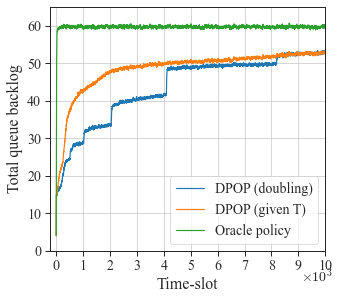

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4.45))
pltutils.plot_backlog_curve(ax, unknownT_backlog_at_tt, knownT_backlog_at_tt, oracle_backlog_at_tt, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/run-plots-backlog.pdf', bbox_inches='tight')
plt.show()

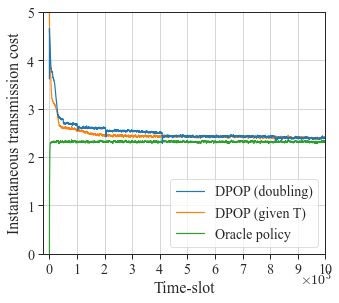

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4.5))
pltutils.plot_transmission_cost_curve(ax, unknownT_tran_cost_at_tt, knownT_tran_cost_at_tt, oracle_tran_cost_at_tt, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/run-plots-cost.pdf', bbox_inches='tight')
plt.show()

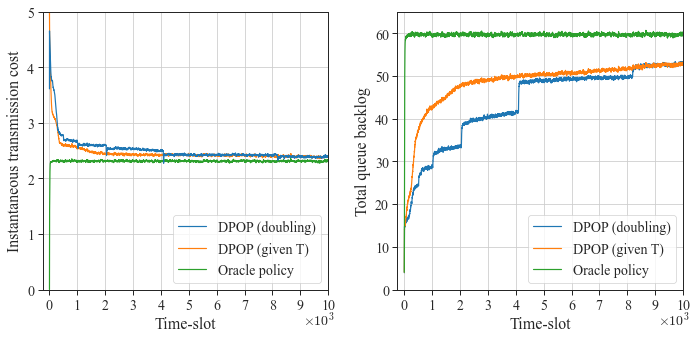

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
pltutils.plot_backlog_curve(axs[1], unknownT_backlog_at_tt, knownT_backlog_at_tt, oracle_backlog_at_tt, LABELS_SIZE)
pltutils.plot_transmission_cost_curve(axs[0], unknownT_tran_cost_at_tt, knownT_tran_cost_at_tt, oracle_tran_cost_at_tt, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/run-plots.pdf', bbox_inches='tight')
plt.show()